<a href="https://colab.research.google.com/github/chrisjulio/INFO7017/blob/main/T1_2_Perceptron01_Christiano_Guilherme_Marcio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="#ff9900"> **Perceptron**</font>
---

O <font color="#66ffff">**Perceptron**</font> de Rosenblatt (1957) foi a primeira *neural network* (NN) descrita com um algoritmo de treinamento, sendo, apesar de suas limitações, a **pedra fundamental das modernas NNs**.

Essencialmente o modelo perceptron é um **classificador linear**. Isto é, o objetivo é encontrar um **"hiperplano"** (uma linha no espaço $2D$, um plano no espaço $3D$ ou outros análogos em espaços superiores) **separando os dados em duas classes**.

Definição
--
Matematicamente um modelo Perceptron pode ser representado como $y = f(w \cdot x + b)$, sendo que $x$ é um vetor de entrada (*input*) formado de valores reais, $w$ é o vetor de pesos (*weights*), $b$ o termo *bias* e f é a função de ativação. O *bias* é independente da entrada e desloca o limite de decisão da sua origem.

A função de ativação $f$ é uma função *threshold* que mapeia as entradas $x$ em um valor de saída que é um valor binário único (1 ou 0), da forma
\begin{align}
        f(x) = \left\{
        \begin{array}{cl}
        1 & if \ w  \cdot x + b \gt 0,  \\
        0 & otherwise
        \end{array}
        \right.
\end{align}

$w \cdot x$ é o produto escalar (*dot product*), isto é, $ \sum_{i=1}^m w_i x_i$, onde $m$ é o número de entradas do perceptron.


Algoritmo de Aprendizado
--
O algoritmo de treinamento do Perceptron (de **uma camada**) foi proposto por Rosenblatt e bastante inspirado na regra Hebb (*Hebbian learning*). Em seu livro *The Organization of Behavior* (1949), Donald Olding Hebb sugeriu que, quando um neurônio biológico dispara outro neurônio, frequentemente a conexão entre esses dois neurônios é fortalecida.

Perceptrons são treinados usando uma variante dessa regra levando em consideração o erro cometido pela rede quando ela faz uma predição. A regra de aprendizado do Perceptron reforça as conexões ajudando a reduzir o erro.

O algoritmo de aprendizado pode ser sumarizado nos seguintes passos:

1. Inicialize os pesos e *bias* com valores aleatórios pequenos.

2. Para cada par entrada-saída $(x, d)$, compute a saída predita $y$ fazendo $f(w \cdot x + b)$.

3. Atualize os pesos e *bias* baseado no erro $e = d - y$ fazendo, $w = w + \eta \cdot e \cdot x $ e $b = b + \eta \cdot e$


Sendo $\eta$ a taxa de aprendizado (*learning rate*), uma pequena constante positiva que controla o incremento (*step size*) das atualizações.

4. Repita os passos 2 e 3 por um número fixo de iterações ou até o erro convergir.

---

> 💡 **Observação**: Para executar a célula de código (aquelas marcadas com ` []`), posicione dentro dela e pressione `Ctrl`+`Enter`. Deve-se respeitar a **sequência** de execução das células.

---

# Perceptron com funções de ativação não lineares

1. Sigmoide:
$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

📊 Características:
Intervalo de saída: (0, 1)

Tipo de função: Suave, contínua, derivável

Usada quando: Queremos probabilidades ou decisões binárias

Valor de saída tende a: 0 para entradas muito negativas, 1 para entradas muito positivas

✅ Vantagens:
Boa para modelar probabilidades

Simples e historicamente muito utilizada em redes neurais

⚠️ Desvantagens:
Derivada pequena para valores extremos (problema do vanishing gradient)

Não é centrada na origem (saída sempre positiva), o que pode desacelerar o treinamento.

---


2. Tanh:
$$
\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
$$

📊 Características:
Intervalo de saída: (−1, 1)

Tipo de função: Suave, contínua, derivável

Simétrica em torno da origem (centrada em zero)

✅ Vantagens:
Produz saídas negativas e positivas, acelerando o aprendizado em comparação à sigmoide

Também útil para redes neurais em camadas ocultas

⚠️ Desvantagens:
Também sofre com vanishing gradient para valores extremos de entrada.

---



3. ReLU:
$$
f(x) = \max(0, x)
$$

📊 Características:
Intervalo de saída: [0, ∞)

Tipo de função: Não suave em x=0, mas contínua e simples

Muito usada atualmente em redes profundas

✅ Vantagens:
Computacionalmente eficiente

Ajuda a resolver o problema do vanishing gradient

Mantém gradientes ativos em regiões positivas

⚠️ Desvantagens:
Para entradas negativas, a saída é zero — isso pode levar a neurônios mortos

Não é centrada em zero.

---

| Função   | Intervalo | Centrada no zero | Vanishing Gradient? | Observações                       |
| -------- | --------- | ---------------- | ------------------- | --------------------------------- |
| Sigmoide | (0, 1)    | ❌ Não            | ✅ Sim               | Saída sempre positiva             |
| Tanh     | (−1, 1)   | ✅ Sim            | ✅ Sim               | Melhora a propagação do gradiente |
| ReLU     | \[0, ∞)   | ❌ Não            | ❌ Não               | Pode gerar neurônios mortos       |



# Codificação:

In [ ]:
class Perceptron:
    """
    A Perceptron is a type of artificial neural network that can be used for binary classification problems.

    This class implements a Perceptron model using the heaviside activation function.
    The model can be used for both training and prediction tasks.

    Parameters:
    -----------
    learning_rate : float
        The learning rate controls the step size of the gradient descent algorithm during training. It determines
        how quickly the model learns from the training data. A smaller learning rate may result in slower convergence,
        while a larger learning rate may cause the algorithm to overshoot the minimum of the loss function.

    epochs : int
        The number of epochs specifies how many times the entire training dataset should be passed through the model
        during training. One epoch consists of iterating through all the training examples once. Increasing the number
        of epochs may improve the performance of the model, but also increases the training time.
    """

    def __init__(self, learning_rate=0.1, epochs=100):
        """
        Initialize a new Perceptron instance with the specified learning rate and number of epochs.

        Parameters:
        -----------
        learning_rate : float
            The learning rate controls the step size of the gradient descent algorithm during training.

        epochs : int
            The number of epochs specifies how many times the entire training dataset should be passed through the
            model during training.
        """
        self.weights = None
        self.bias = None
        self.learning_rate = learning_rate
        self.epochs = epochs


    def activation(self, z):
        """
        The activation function computes the output of the Perceptron given its input.

        This implementation uses the heaviside activation function, which returns 1 if the input is greater than or
        equal to zero, and 0 otherwise.

        Parameters:
        -----------
        z : float
            The input to the activation function, which is the dot product of the input features and the model weights
            plus the bias term.

        Returns:
        --------
        float
            The output of the activation function.
        """
        return np.heaviside(z, 0) # heaviside(z) heaviside -> activation


    def fit(self, X, y):
        """
        Train the Perceptron on the provided training data.

        This method updates the model weights and bias term using the specified learning rate and number of epochs,
        until the algorithm converges or the maximum number of epochs is reached.

        Parameters:
        -----------
        X : numpy.ndarray
            A 2D array of shape (n_samples, n_features) containing the input features for each training example.

        y : numpy.ndarray
            A 1D array of shape (n_samples,) containing the target binary class labels for each training example.
            The values should be either 0 or 1.

        Returns:
        --------
        tuple
            A tuple containing the trained weights and bias term of the Perceptron.
        """
        n_features = X.shape[1]

        # Initializing weights and bias
        self.weights = np.zeros((n_features))
        self.bias = 0

        # Iterating until the number of epochs
        for epoch in range(self.epochs):

            # Traversing through the entire training set
            for i in range(len(X)):
                z = np.dot(X, self.weights) + self.bias # Finding the dot product and adding the bias
                y_pred = self.activation(z) # Passing through an activation function

                #Updating weights and bias
                self.weights += self.learning_rate * (y[i] - y_pred[i]) * X[i]
                self.bias += self.learning_rate * (y[i] - y_pred[i])

        return self.weights, self.bias


    def predict(self, X):
        """
        Predicts the binary class label for input data X.

        Parameters:
        -----------
        X : ndarray, shape (n_samples, n_features)
            The input data.

        Returns:
        --------
        ndarray, shape (n_samples,)
            The binary class labels predicted by the perceptron.
        """
        z = np.dot(X, self.weights) + self.bias
        return self.activation(z)

Importação dos Módulos
--

Antes de mais nada vamos importar as bibliotecas necessárias.

A primeira é ``NumPy`` (https://numpy.org/). NumPy é um pacote fundamental para computação científica com Python, sendo uma biblioteca bastante madura otimizada para manipular *arrays* multidimensionais gigantes. Seu desenvolvimento é comunitário e possui licença BSD.

Já ``pandas``  (https://pandas.pydata.org/) utilizaremos brevemente para análise exploratório de dados.

Finalmente vamos importar a biblioteca ``Matplotlib``(https://matplotlib.org/) para auxiliar na visualização de gráficos.

In [ ]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

# versions
print(f'numpy:{np.__version__}\npandas:{pd.__version__}')

numpy:2.0.2
pandas:2.2.2


Implementação do Perceptron
--

Vamos implementar uma classe `Perceptron` para representar um modelo Perceptron. Inicialmente definimos os atributos constituintes do modelo. Os hiperparâmetros `learning_rate` e `epochs` são usados no algoritmo de treinamento. A taxa de aprendizagem (`learning_rate`) é usada para limitar a quantidade que cada peso é corrigido cada vez que é atualizado. Já iterações ou épocas (`epochs`) indica o número de vezes para executar passando pelos dados de treinamento, enquanto atualiza o peso.

```python
class Perceptron:
    
    def __init__(self, learning_rate=0.1, epochs=100):
        self.weights = None
        self.bias = None
        self.learning_rate = learning_rate
        self.epochs = epochs
```


Ainda na classe precisamos definir a função de ativação que computa a saída do Perceptron dado uma entrada.

Funções de ativação são uma parte essencial dos Perceptrons e redes neurais porque elas permitem que o modelo aprenda e tome decisões com base nos dados de entrada. Elas também ajudam a introduzir não-linearidade no modelo, o que é necessário para aprender relacionamentos mais complexos nos dados.

Alguns tipos comuns de funções de ativação usados nos Perceptrons são Sign, o Heaviside, Sigmoid, ReLU, etc.


Nesta implementação utilizaremos a função ``heaviside``, que retorna $1$ se a entrada for $ \ge 0$ e $0$ caso contrário.
                

```python
    # heaviside activation function
    def activation(self, z):
        return np.heaviside(z, 0) # heaviside(z) heaviside -> activation
```

Na sequência o algoritmo de treinamento. Vamos manter a nomenclatura da ``Scikit-learn``, portanto nossa função será chamada ``fit``.

Esse algoritmo de otimização funciona baseando-se no fato de que cada instância de treinamento é apresentada ao modelo uma de cada vez. O modelo faz uma previsão para uma instância de treinamento, o erro é calculado e o modelo é atualizado para reduzir o erro na próxima previsão. Assim tal procedimento pode ser usado para encontrar o conjunto de pesos em um modelo que resultem no menor erro para o modelo nos dados de treinamento.


```python
    def fit(self, X, y):
    
        n_features = X.shape[1]
        
        # Initializing weights and bias
        self.weights = np.zeros((n_features))
        self.bias = 0
        
        # Iterating until the number of epochs
        for epoch in range(self.epochs):
            
            # Traversing through the entire training set
            for i in range(len(X)):
                z = np.dot(X, self.weights) + self.bias # Finding the dot product and adding the bias
                y_pred = self.activation(z) # Passing through an activation function
                
                # Updating weights and bias
                self.weights += self.learning_rate * (y[i] - y_pred[i]) * X[i]
                self.bias += self.learning_rate * (y[i] - y_pred[i])
                
        return self.weights, self.bias
```

Finalmente a predição, no método ``predict``.

```python
    def predict(self, X):

        z = np.dot(X, self.weights) + self.bias
        return self.activation(z)
```

A partir daqui devem ser implementadas as mudanças no código para refletir as classes propostas na atividade.

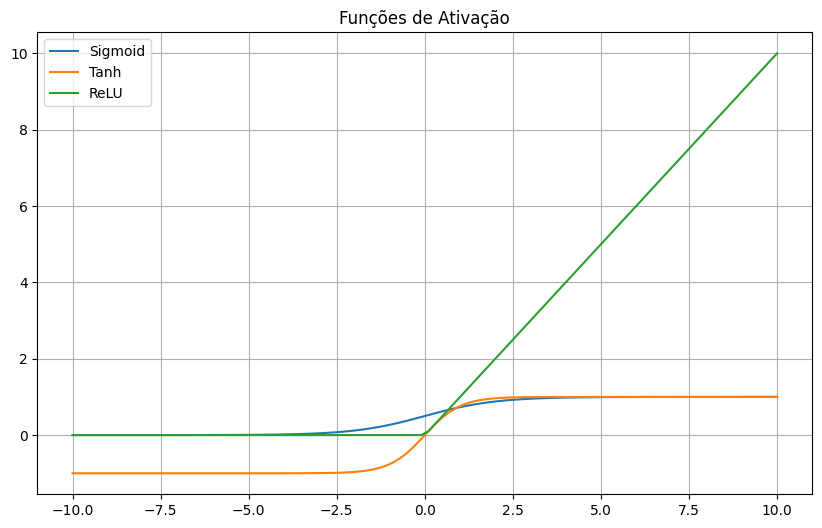

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 100)

# Funções
sigmoid = 1 / (1 + np.exp(-x))
tanh = np.tanh(x)
relu = np.maximum(0, x)

plt.figure(figsize=(10, 6))
plt.plot(x, sigmoid, label='Sigmoid')
plt.plot(x, tanh, label='Tanh')
plt.plot(x, relu, label='ReLU')
plt.title("Funções de Ativação")
plt.legend()
plt.grid(True)
plt.show()

# Classe Perceptron Customizada

In [ ]:
class CustomPerceptron:
    def __init__(self, lr=0.01, epochs=1000, activation='sigmoid'):
        self.lr = lr
        self.epochs = epochs
        self.activation_name = activation
        self.activation_func = self.get_activation_func(activation)
        self.weights = None
        self.bias = None

    def get_activation_func(self, name):
        if name == 'sigmoid':
            return lambda x: 1 / (1 + np.exp(-x))
        elif name == 'tanh':
            return np.tanh
        elif name == 'relu':
            return lambda x: np.maximum(0, x)
        else:
            raise ValueError("Função de ativação não suportada.")

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        return self.activation_func(z)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            for xi, target in zip(X, y):
                z = np.dot(xi, self.weights) + self.bias
                a = self.activation_func(z)
                error = target - a
                grad = error * xi
                self.weights += self.lr * grad
                self.bias += self.lr * error

**bold text**# Carregamento do Dataset Iris

obs: verificar se estes dois parametros serão o suficiente.

Além disso, foi feita a **"binarização": setosa ou não setosa**

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

iris = load_iris()
X = iris.data[:, [0, 2]]  # 2 features principais: sepal length, petal length
y = (iris.target != 0).astype(int)  # binarizando (classe 0 vs resto)

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Avaliação e Resultados

In [ ]:
results = []

for act in ['sigmoid', 'tanh', 'relu']:
    model = CustomPerceptron(lr=0.1, epochs=1000, activation=act)
    model.fit(X_train, y_train)
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    results.append((act, acc, cm))

    print(f"\nAtivação: {act}")
    print("Acurácia:", acc)
    print("Matriz de Confusão:\n", cm)


Ativação: sigmoid
Acurácia: 1.0
Matriz de Confusão:
 [[19  0]
 [ 0 26]]

Ativação: tanh
Acurácia: 1.0
Matriz de Confusão:
 [[19  0]
 [ 0 26]]

Ativação: relu
Acurácia: 1.0
Matriz de Confusão:
 [[19  0]
 [ 0 26]]


# Tabela Comparativa de Resultados

In [ ]:
import pandas as pd

tabela_resultados = pd.DataFrame(
    [(r[0], r[1]) for r in results],
    columns=['Função de Ativação', 'Acurácia']
)

print(tabela_resultados)

  Função de Ativação  Acurácia
0            sigmoid       1.0
1               tanh       1.0
2               relu       1.0


# Visualização da Fronteira de Decisão (para cada ativação)

In [ ]:
def plot_decision_boundary(model, X, y, title="Fronteira"):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    grid = np.c_[xx.ravel(), yy.ravel()]
    preds = model.predict(grid).reshape(xx.shape)

    plt.contourf(xx, yy, preds > 0.5, alpha=0.3, cmap=plt.cm.RdBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu, edgecolors='k')
    plt.title(title)
    plt.show()

# Loop para as 3 funções

Treinando Perceptron com ativação: sigmoid
Acurácia: 1.0
Matriz de Confusão:
 [[19  0]
 [ 0 26]]


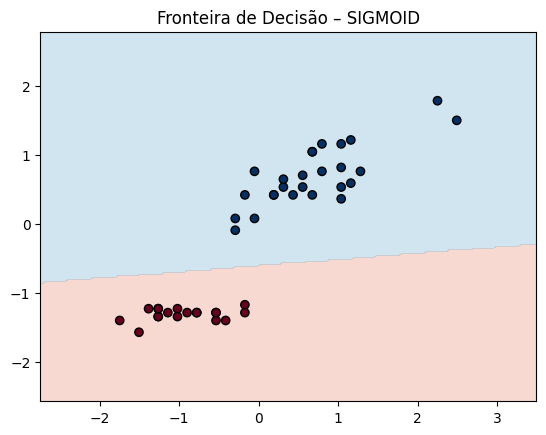

Treinando Perceptron com ativação: tanh
Acurácia: 1.0
Matriz de Confusão:
 [[19  0]
 [ 0 26]]


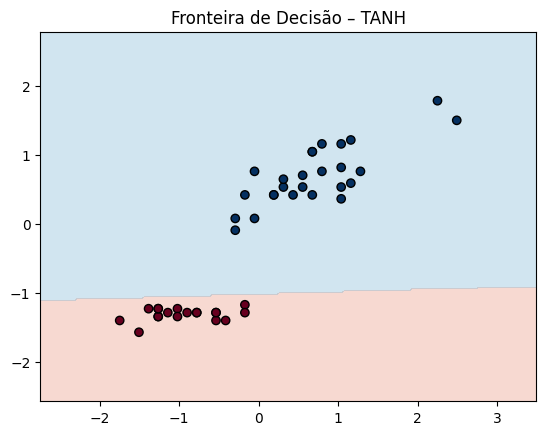

Treinando Perceptron com ativação: relu
Acurácia: 1.0
Matriz de Confusão:
 [[19  0]
 [ 0 26]]


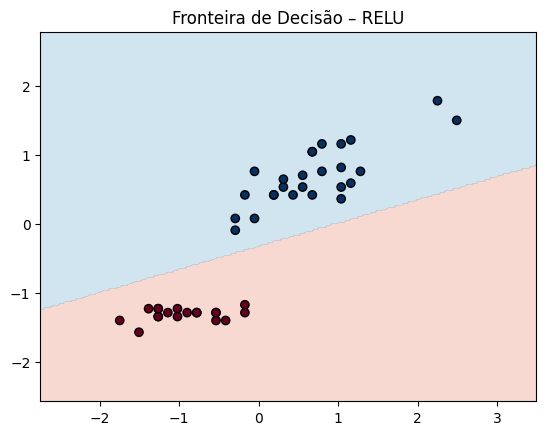

In [ ]:
for act in ['sigmoid', 'tanh', 'relu']:
    print(f"Treinando Perceptron com ativação: {act}")
    model = CustomPerceptron(lr=0.1, epochs=1000, activation=act)
    model.fit(X_train, y_train)

    y_pred = (model.predict(X_test) > 0.5).astype(int)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print("Acurácia:", acc)
    print("Matriz de Confusão:\n", cm)

    plot_decision_boundary(model, X_test, y_test, f"Fronteira de Decisão – {act.upper()}")

Discutir as distribuições!!!

Lembrando que está **binarizado (setosa e não setosa)**

---


In [ ]:
import numpy as np

class MulticlassPerceptron:
    def __init__(self, lr=0.01, epochs=1000, activation='sigmoid'):
        self.lr = lr
        self.epochs = epochs
        self.activation_name = activation
        self.activation_func = self.get_activation_func(activation)
        self.weights = None  # shape: (n_classes, n_features)
        self.bias = None     # shape: (n_classes,)

    def get_activation_func(self, name):
        if name == 'sigmoid':
            return lambda x: 1 / (1 + np.exp(-x))
        elif name == 'tanh':
            return np.tanh
        elif name == 'relu':
            return lambda x: np.maximum(0, x)
        else:
            raise ValueError("Função de ativação não suportada.")

    def fit(self, X, y):
        n_samples, n_features = X.shape
        n_classes = len(np.unique(y))

        self.weights = np.zeros((n_classes, n_features))
        self.bias = np.zeros(n_classes)

        # One-hot encoding das saídas
        y_onehot = np.zeros((n_samples, n_classes))
        for idx, label in enumerate(y):
            y_onehot[idx, label] = 1

        for _ in range(self.epochs):
            for xi, target_vec in zip(X, y_onehot):
                z = np.dot(self.weights, xi) + self.bias
                a = self.activation_func(z)
                error = target_vec - a

                # Atualiza pesos e bias por classe
                self.weights += self.lr * np.outer(error, xi)
                self.bias += self.lr * error

    def predict(self, X):
        z = np.dot(X, self.weights.T) + self.bias
        a = self.activation_func(z)
        return np.argmax(a, axis=1)

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Carregar dados
iris = load_iris()
X = iris.data[:, [0, 2]]  # Sepal length e petal length
y = iris.target           # 3 classes

# Padronização
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar modelo
model = MulticlassPerceptron(lr=0.1, epochs=1000, activation='sigmoid')
model.fit(X_train, y_train)

# Predição
y_pred = model.predict(X_test)

# Avaliação
print("Acurácia:", accuracy_score(y_test, y_pred))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))

Acurácia: 1.0
Matriz de Confusão:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



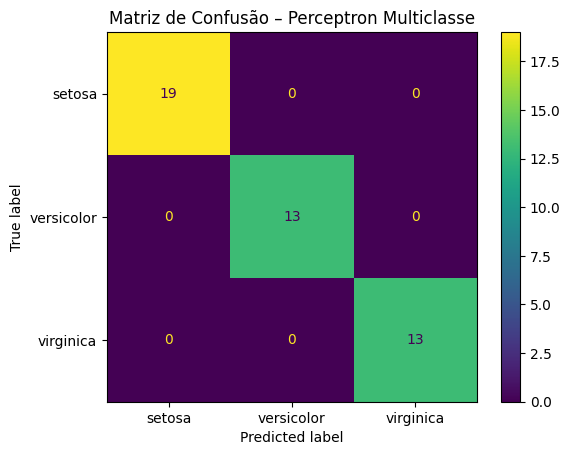

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.viridis)
plt.title("Matriz de Confusão – Perceptron Multiclasse")
plt.grid(False)
plt.show()

In [ ]:
def plot_decision_boundaries_multiclass(X, y, model, title="Fronteira de Decisão – Multiclasse"):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))

    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='k')

    # Corrigido: legenda segura
    handles, _ = scatter.legend_elements()
    labels = np.unique(y).astype(int)
    class_names = iris.target_names[labels]
    plt.legend(handles, class_names, title="Classes")

    plt.xlabel("Sepal Length (padronizado)")
    plt.ylabel("Petal Length (padronizado)")
    plt.title(title)
    plt.grid(True)
    plt.show()

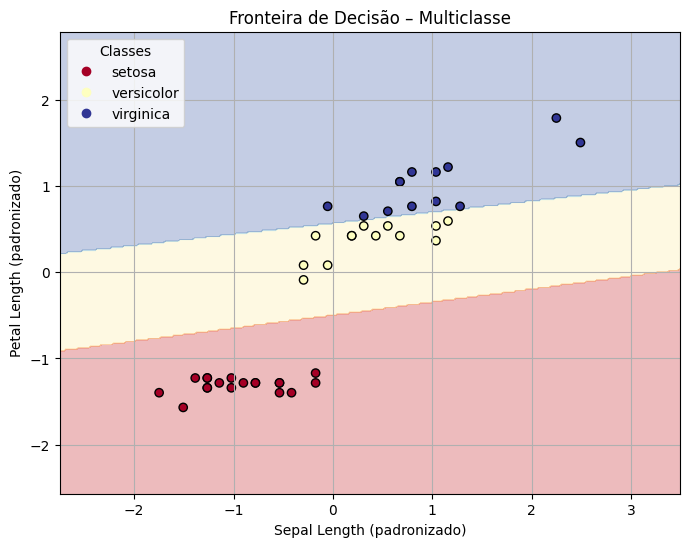

In [ ]:
plot_decision_boundaries_multiclass(X_test, y_test, model)

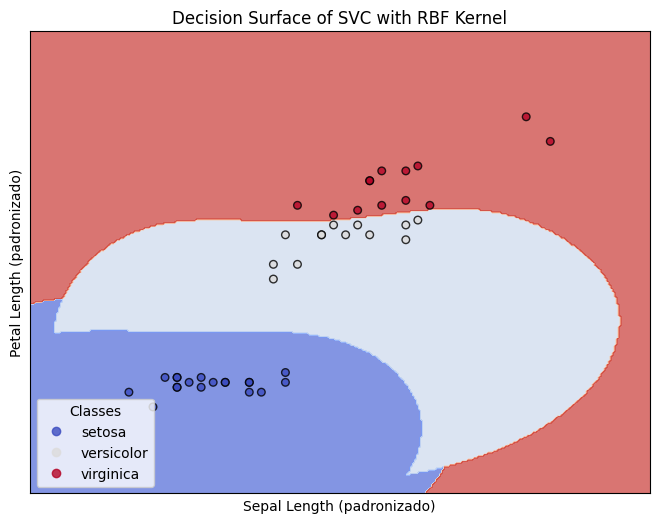

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 1. Carregar e preparar dados
iris = load_iris()
X = iris.data[:, [0, 2]]  # Sepal length e petal length
y = iris.target

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Treinar modelo SVC com kernel RBF
model = SVC(kernel='rbf', gamma='scale', C=1.0)
model.fit(X_train, y_train)

# 3. Função auxiliar para criar a malha
def make_meshgrid(x, y, h=0.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

# 4. Função para plotar a superfície de decisão
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# 5. Plotar
fig, ax = plt.subplots(figsize=(8, 6))

# Criar grid
X0, X1 = X_test[:, 0], X_test[:, 1]
xx, yy = make_meshgrid(X0, X1)

# Plotar fronteiras
plot_contours(ax, model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)

# Plotar pontos de teste
scatter = ax.scatter(X0, X1, c=y_test, cmap=plt.cm.coolwarm, s=30, edgecolors='k', alpha=0.8)

# Rótulos e título
ax.set_xlabel('Sepal Length (padronizado)')
ax.set_ylabel('Petal Length (padronizado)')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Decision Surface of SVC with RBF Kernel')

# Legenda
handles, _ = scatter.legend_elements()
labels = np.unique(y_test)
ax.legend(handles, iris.target_names[labels], title="Classes", loc="lower left")

plt.show()

O perceprtron Multiclasse funcionou bem neste caso porque os dados da base Iris com 2 features são bem separados linearmente.

O SVC com Kernel RBF oferece uma solução flexível e podencialmente lida melhor com casos mais complexos, ruidosos ou com margens não tão claras, isto é, onde não são linearmente separáveis.

Conclusivamente, o SVC tem mais transparência e controle, permitindo uso em aplicações mais robustas.


**Discutir melhor os resultados! ajuda nóis kkkk**